In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://www.stats.ox.ac.uk/~snijders/siena/tutorial2010_data.htm - data source

In [2]:
col_widths = [3] * 26
friendship = pd.read_fwf('klas12b-net-1.dat', widths=col_widths, header=None)

In [3]:
sex_and_religion = pd.read_fwf('klas12b-demographics.dat', widths=[2]*5, header=None)[[0,4]]
#Sex (1 = girl, 2 = boy)
#Religion (1 = Christian, 2 = non-religious, 3 = non-Christian religion, 0 = missing)

In [4]:
G = nx.DiGraph()

for i in range(len(friendship)):
    G.add_node(i + 1, sex=sex_and_religion.iloc[i, 0]) 
for i in range(len(friendship)):
    for j in range(len(friendship.columns)):
        if friendship.iloc[i, j] == 1:
            sex_i = G.nodes[i + 1]['sex']
            sex_j = G.nodes[j + 1]['sex']
            G.add_edge(i + 1, j + 1, sex_i=sex_i, sex_j=sex_j)  

In [5]:
edge_colors = [
    'lightcoral' if G.edges[edge]['sex_i'] == G.edges[edge]['sex_j'] and G.edges[edge]['sex_i'] == 1 else
    'lightblue' if G.edges[edge]['sex_i'] == G.edges[edge]['sex_j'] and G.edges[edge]['sex_i'] == 2 else
    'grey' for edge in G.edges
]
color_map = {0: 'moccasin', 1: 'lightcyan', 2: 'lightgrey', 3: 'pink'}
node_colors = [color_map[religion] for religion in sex_and_religion[4]]

legend_labels_rel = {
    'Non-Religious': 'lightgrey',
    'Christian': 'lightcyan',
    'Non-Christian Religion': 'pink',
    'Missing': 'moccasin'
}
legend_labels_sex = {
    'Girl-Boy Friendship': 'grey',
    'Girl-Girl Friendship': 'lightcoral',
    'Boy-Boy Friendship': 'lightblue'
}

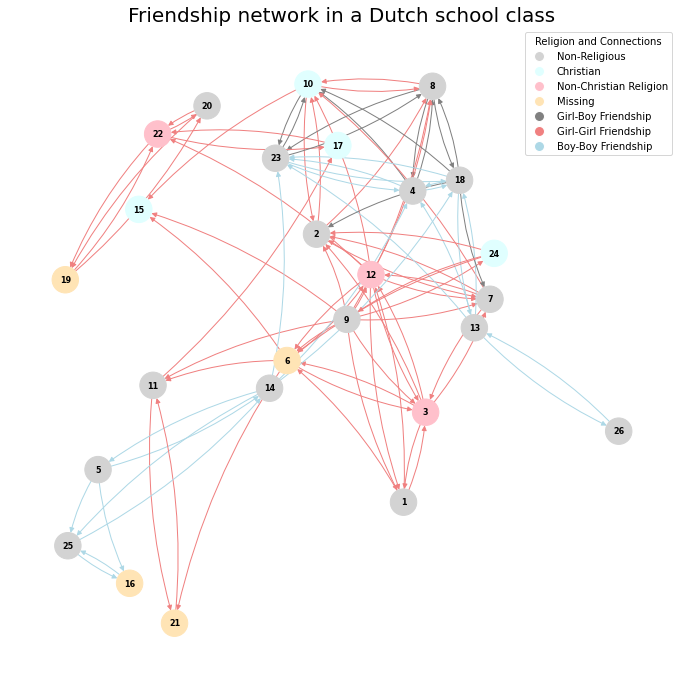

In [6]:
pos = nx.spring_layout(G, k=1)
plt.figure(figsize=(12, 12))
plt.title('Friendship network in a Dutch school class', fontsize=20)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_size=8,
        connectionstyle='arc3,rad=0.1', edge_color=edge_colors)  # connectionstyle adds a slight curve to the edges

legend_patches_rel = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                      for label, color in legend_labels_rel.items()]
legend_patches_sex = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                      for label, color in legend_labels_sex.items()]

plt.legend(handles=legend_patches_rel + legend_patches_sex, loc='upper right', title='Religion and Connections')

#plt.savefig('HW6_G.png', bbox_inches='tight')
plt.show()